In [2]:
using Luxor

2: Combining scenes


In [3]:
sun24demo = Movie(400, 400, "sun24", 0:23)

Movie(400.0, 400.0, "sun24", 0:23)

In [4]:
function backgroundfunction(scene::Scene, framenumber)
    background("black")
end

backgroundfunction (generic function with 1 method)

In [5]:
function nightskyfunction(scene::Scene, framenumber)
    sethue("midnightblue")
    box(O, 400, 400, :fill)
end

nightskyfunction (generic function with 1 method)

In [6]:
function dayskyfunction(scene::Scene, framenumber)
    sethue("skyblue")
    box(O, 400, 400, :fill)
end

dayskyfunction (generic function with 1 method)

In [7]:
function sunfunction(scene::Scene, framenumber)
    t = rescale(framenumber, 0, 23, 2pi, 0)
    gsave()
        sethue("yellow")
        circle(polar(150, t), 20, :fill)
    grestore()
end

sunfunction (generic function with 1 method)

In [8]:
function groundfunction(scene::Scene, framenumber)
    gsave()
    sethue("brown")
    box(Point(O.x, O.y + 100), 400, 200, :fill)
    grestore()
    sethue("white")
end
```

LoadError: syntax: incomplete: invalid "`" syntax

In [9]:
backdrop  = Scene(sun24demo, backgroundfunction, 0:23)   # every frame
nightsky  = Scene(sun24demo, nightskyfunction, 0:6)      # midnight to 06:00
nightsky1 = Scene(sun24demo, nightskyfunction, 17:23)    # 17:00 to 23:00
daysky    = Scene(sun24demo, dayskyfunction, 5:19)       # 05:00 to 19:00
sun       = Scene(sun24demo, sunfunction, 6:18)          # 06:00 to 18:00
ground    = Scene(sun24demo, groundfunction, 0:23)       # every frame

Scene(Movie(400.0, 400.0, "sun24", 0:23), groundfunction, 0:23, Luxor.lineartween, nothing)

┌ Info: Frames for animation "sun24" are being stored in directory: 
│ 	 C:\Users\STEFA\AppData\Local\Temp\jl_WhRF7B
└ @ Luxor C:\Users\STEFA\.julia\packages\Luxor\kDdL3\src\animate.jl:195
┌ Info: ... 24 frames saved in directory:
│ 	 C:\Users\STEFA\AppData\Local\Temp\jl_WhRF7B
└ @ Luxor C:\Users\STEFA\.julia\packages\Luxor\kDdL3\src\animate.jl:217
┌ Info: GIF is: C:\Users\STEFA\AppData\Local\Temp\jl_WhRF7B/sun24.gif
└ @ Luxor C:\Users\STEFA\.julia\packages\Luxor\kDdL3\src\animate.jl:246


Luxor.AnimatedGif("C:\\Users\\STEFA\\AppData\\Local\\Temp\\jl_WhRF7B/sun24.gif")
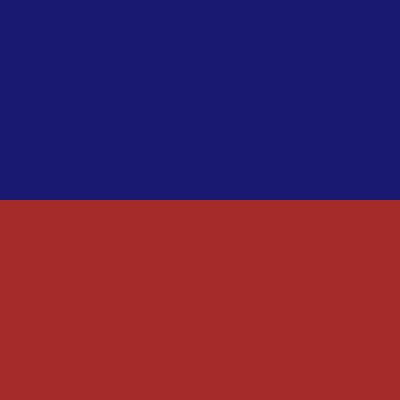

In [10]:
animate(sun24demo, [
   backdrop, nightsky, nightsky1, daysky, sun, ground
   ],
   framerate=5,
   creategif=true)

In [11]:
function frame(scene, framenumber)
    background("black")
    n   = rescale(framenumber, scene.framerange.start, scene.framerange.stop, 0, 1)
    n2π = rescale(n, 0, 1, 0, 2π)
    sethue(n, 0.5, 0.5)
    box(BoundingBox(), :fill)
    if 0.25 < n < 0.75
        sethue("yellow")
        circle(polar(150, n2π + π/2), 20, :fill)
    end
    if n < 0.25 || n > 0.75
        sethue("white")
        circle(polar(150, n2π + π/2), 20, :fill)
    end
end

frame (generic function with 1 method)